### Solving Poisson equation using the FD method

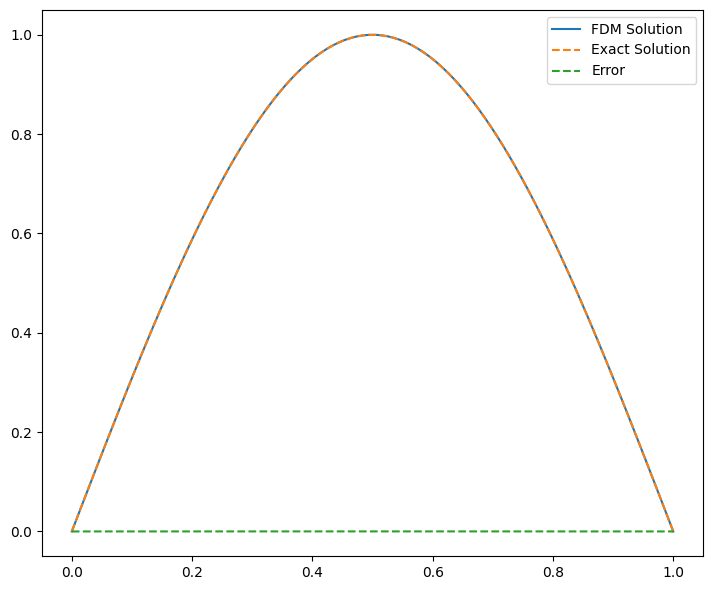

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100     # Number of rigid points
x = np.linspace(0, 1, N)
dx = 1 / (N - 1)
f = np.pi ** 2 * np.sin(np.pi * x)

# Finite difference matrix
A = (np.diag(-2 * np.ones(N)) + np.diag(np.ones(N - 1), 1) + \
    np.diag(np.ones(N-1), -1)) / dx ** 2

# Apply boundary conditions
A[0, 0] = A[-1, -1] = 1
A[0, 1] = A[-1, -2] = 0

# Modify f for boundary conditions
f[0] = f[-1] = 0

# Solve the linear system
u_fd = np.linalg.solve(A, -f)
u_exact = np.sin(np.pi * x).flatten()

# Plot the result
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(x, u_fd, label = "FDM Solution")
plt.plot(x, u_exact, '--', label = "Exact Solution")
plt.legend()

plt.subplot(1, 2, 1)
plt.plot(x, u_fd - u_exact, '--', label = "Error")
plt.legend()
plt.tight_layout()
plt.show()

### Solving Poisson equation using the PINN method

c:\Users\JUANJO\Documents\GitHub\ams-516\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 0: Loss = [[48.892033]]
Epoch 100: Loss = [[32.018547]]
Epoch 200: Loss = [[8.538292]]
Epoch 300: Loss = [[6.01571]]
Epoch 400: Loss = [[2.438708]]
Epoch 500: Loss = [[0.8161547]]
Epoch 600: Loss = [[0.27124396]]
Epoch 700: Loss = [[0.12900828]]
Epoch 800: Loss = [[0.0819978]]
Epoch 900: Loss = [[0.05687205]]
Epoch 1000: Loss = [[0.04149166]]
Epoch 1100: Loss = [[0.03117781]]
Epoch 1200: Loss = [[0.02382909]]
Epoch 1300: Loss = [[0.01840756]]
Epoch 1400: Loss = [[0.01432614]]
Epoch 1500: Loss = [[0.0112128]]
Epoch 1600: Loss = [[0.00881485]]
Epoch 1700: Loss = [[0.00695406]]
Epoch 1800: Loss = [[0.00550159]]
Epoch 1900: Loss = [[0.00436283]]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step 


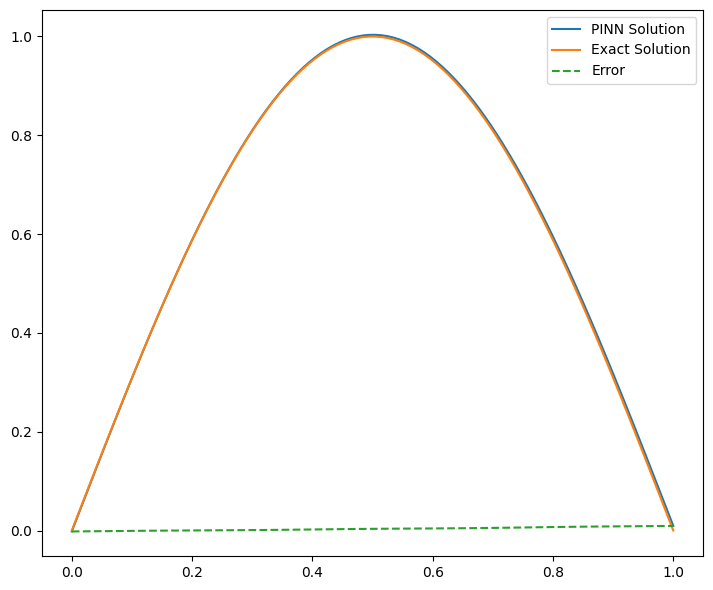

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the network

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = 'tanh', input_shape = (1,)),
    tf.keras.layers.Dense(10, activation = 'tanh'),
    tf.keras.layers.Dense(1)
])

# Define the physics loss and boundary loss
def loss(model, x, f):
    with tf.GradientTape(persistent = True) as tape:
        tape.watch(x)
        u = model(x)
        u_x = tape.gradient(u, x)
        u_xx = tape.gradient(u_x, x)
    
    physics_loss = tf.reduce_mean(tf.square(u_xx + f))

    # Boundary loss
    u_0 = model(tf.convert_to_tensor([[0.0]], dtype = tf.float32))
    u_1 = model(tf.convert_to_tensor([[1.0]], dtype = tf.float32))
    boundary_loss = tf.square(u_0) + tf.square(u_1)

    return physics_loss + boundary_loss

# Training data
x = tf.convert_to_tensor(np.linspace(0, 1, 100).reshape(-1, 1), dtype = tf.float32)

f = np.pi ** 2 * np.sin(np.pi * x)

# Optimizer
optimizer = tf.keras.optimizers.Adam()

for epoch in range(2000):
    with tf.GradientTape() as tape:
        current_loss = loss(model, x, f)
    gradients = tape.gradient(current_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss = {current_loss.numpy()}')

# Evaluate the trained model
u_pinn = model.predict(x)
u_exact = np.sin(np.pi * x)

# Plot the result
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(x, u_pinn, label = "PINN Solution")
plt.plot(x, u_exact, label = "Exact Solution")
plt.legend()

plt.subplot(1, 2, 1)
plt.plot(x, u_pinn - u_exact, '--', label = "Error")
plt.legend()
plt.tight_layout()
plt.show()